In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [8]:
data = pd.read_csv('./diabetes.csv')
print(data)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [3]:
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
train_data.to_csv('train_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)

In [4]:
data = pd.read_csv('./train_data.csv')
print(data)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              2       84              0              0        0   0.0   
1              9      112             82             24        0  28.2   
2              1      139             46             19       83  28.7   
3              0      161             50              0        0  21.9   
4              6      134             80             37      370  46.2   
..           ...      ...            ...            ...      ...   ...   
609            5      139             64             35      140  28.6   
610            1       96            122              0        0  22.4   
611           10      101             86             37        0  45.6   
612            0      141              0              0        0  42.4   
613            0      125             96              0        0  22.5   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.304   21        0  
1                  

In [5]:
xTrain = data.values
xTrain = np.delete(xTrain, 8, axis=1)

yTrain = data['Outcome'].values

In [6]:
data = pd.read_csv('./test_data.csv')
print(data)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6       98             58             33      190  34.0   
1              2      112             75             32        0  35.7   
2              2      108             64              0        0  30.8   
3              8      107             80              0        0  24.6   
4              7      136             90              0        0  29.9   
..           ...      ...            ...            ...      ...   ...   
149            9      165             88              0        0  30.4   
150            1       77             56             30       56  33.3   
151            8       95             72              0        0  36.8   
152            2      146             70             38      360  28.0   
153            8       74             70             40       49  35.3   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.430   43        0  
1                  

In [7]:
xTest = data.values
xTest = np.delete(xTest, 8, axis=1)

yTest = data['Outcome'].values

In [8]:
from sklearn.preprocessing import MinMaxScaler

xTrain = MinMaxScaler().fit_transform(xTrain)
xTest = MinMaxScaler().fit_transform(xTest)

print("Data Train :\n")
print(xTrain, "\n\n")
print("Data Test :\n")
print(xTest)

Data Train :

[[0.11764706 0.42211055 0.         ... 0.         0.09649872 0.        ]
 [0.52941176 0.56281407 0.67213115 ... 0.42026826 0.51409052 0.48333333]
 [0.05882353 0.69849246 0.37704918 ... 0.42771982 0.24594364 0.01666667]
 ...
 [0.58823529 0.50753769 0.70491803 ... 0.67958271 0.45175064 0.28333333]
 [0.         0.70854271 0.         ... 0.6318927  0.05422716 0.13333333]
 [0.         0.6281407  0.78688525 ... 0.33532042 0.07856533 0.        ]] 


Data Test :

[[0.46153846 0.26666667 0.50877193 ... 0.63909774 0.25465839 0.47826087]
 [0.15384615 0.37037037 0.65789474 ... 0.67105263 0.03571429 0.        ]
 [0.15384615 0.34074074 0.56140351 ... 0.57894737 0.04347826 0.        ]
 ...
 [0.61538462 0.24444444 0.63157895 ... 0.69172932 0.29736025 0.7826087 ]
 [0.15384615 0.62222222 0.61403509 ... 0.52631579 0.18245342 0.17391304]
 [0.61538462 0.08888889 0.61403509 ... 0.66353383 0.4681677  0.39130435]]


In [9]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=3, learning_rate_init=0.1, max_iter=100)

clf.fit(xTrain, yTrain)

MLPClassifier(hidden_layer_sizes=3, learning_rate_init=0.1, max_iter=100)

In [10]:
yPred = clf.predict(xTest)

In [11]:
from sklearn.metrics import accuracy_score

akurasi = round(accuracy_score(yTest, yPred), 3)
print("Akurasi model :", akurasi)

Akurasi model : 0.773


In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

cMatrix = confusion_matrix(yTest, yPred)
print(cMatrix)

[[89 10]
 [25 30]]


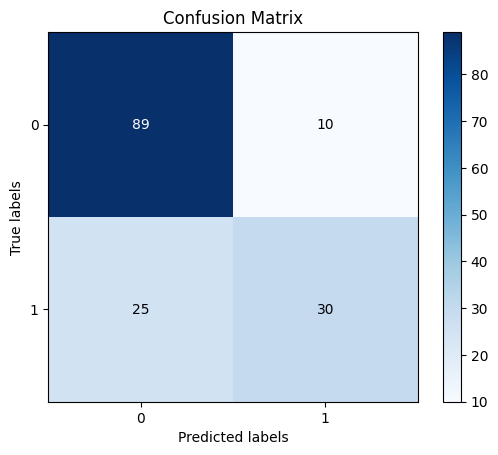

In [19]:
plt.imshow(cMatrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.xticks(np.arange(2), ['0', '1'])
plt.yticks(np.arange(2), ['0', '1'])

thresh = cMatrix.max() / 2.
for i in range(cMatrix.shape[0]):
  for j in range(cMatrix.shape[1]):
    plt.text(j, i, format(cMatrix[i, j], 'd'),
      ha="center", va="center",
      color="white" if cMatrix[i, j] > thresh else "black")

plt.show()

In [27]:
tn = cMatrix[0][0]
fn = cMatrix[1][0]
tp = cMatrix[1][1]
fp = cMatrix[0][1]

print(fp)

10


In [28]:
def akurasi(tn, tp, fn, fp):
  akurasi = (tn + tp) / (tn + tp + fn + fp)
  return akurasi

print(akurasi(tn, tp, fn, fp))

0.7727272727272727


In [32]:
def presisi(tp, fp):
  presisi = tp / (tp + fp)
  return presisi

print(presisi(tp, fp))
pre = presisi(tp, fp)

0.75


In [33]:
def recall(tp, fn):
  recall = tp / (tp + fn)
  return recall

print(recall(tp, fn))
rec = recall(tp, fn)

0.5454545454545454


In [31]:
def spesifitas(tn, fp):
  spesifitas = tn / (tn + fp)
  return spesifitas

print(spesifitas(tn, fp))

0.898989898989899


In [34]:
def f1score(recall, presisi):
  fscore = (2 * recall * presisi) / (recall + presisi)
  return fscore

print(f1score(rec, pre))

0.631578947368421
